# 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.empty((100,2))
x[:, 0] = np.random.uniform(0., 100., size=100)
x[:, 1] = 0.75 * x[:, 0] + 3. + np.random.normal(0, 10., size=100)

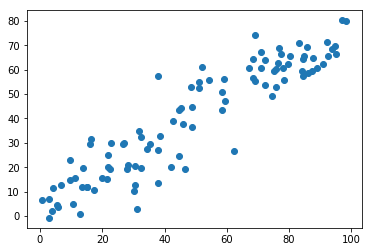

In [3]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [4]:
def demean(x):
    return x - np.mean(x, axis=0)  # 在列上求mean,即 样本 - 各个特征的均值

x = demean(x)

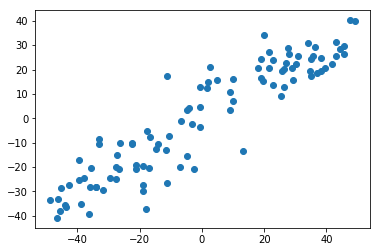

In [5]:
x_demean = demean(x)
plt.scatter(x_demean[:,0], x_demean[:,1])
plt.show()

In [8]:
def f(w, x):
    '''目标函数'''
    return np.sum((x.dot(w))**2)/len(x)

def df(w, x):
    return x.T.dot(x.dot(w)) * 2./len(x)

def direction(w):
    '''将一个向量变成单位向量'''
    return w / np.linalg.norm(w)  # norm 求向量的模(实际上是根据ord返回范数)

def first_component(x, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, x)
        last_w = w  # 我们投影的时候是投影在方向向量w上面的,即需要将w变成单位方向向量
        w = w + eta * gradient
        w = direction(w)   # 注意归一化为单位方向向量 [1]
        if (abs(f(w, x) - f(last_w, x)) < epsilon):
            break
        cur_iter += 1
    
    return w

In [9]:
initial_w = np.random.random(x.shape[1])
eta = 0.01
w = first_component(x, initial_w, eta)
w

array([0.79119843, 0.61155952])

#### $X^{(i)}\cdot w = \left \| X_{project}^{(i)} \right \|$

$X_{project}^{(i)}=\left \| X_{project}^{(i)} \right \| \cdot w$

第二主成分上的投影向量 $=X^{(i)} - X_{project}^{(i)}$

In [20]:
# x2 = np.empty(x.shape)
# for i in range(len(x)):
#     x2[i] = x[i] - x[i].dot(w) * w

# 求x2的向量化方法
x2 = x - x.dot(w).reshape(-1,1) * w  #### 后面是(100,2) - (100,1)*(2, )
# w.shape   ###(2, )
# x.shape   ###(100, 2)
# x.dot(w).reshape(-1, 1).shape  ###(100,1)
# x2 = x - x.dot(w) * w   #### 这里报错是因为 (100,2) - (100,) *(2, )
x2.shape   ####(100, 2)

(100, 2)

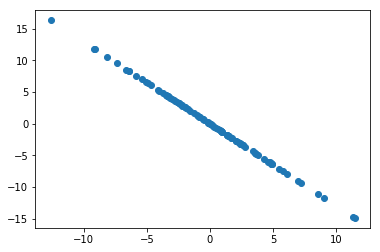

In [11]:
plt.scatter(x2[:,0], x2[:,1])
plt.show()

In [12]:
# 复用第一主成分的代码, 求出第二主成分方向向量(即系数)
w2 = first_component(x2, initial_w, eta)
w2

array([-0.61155478,  0.79120209])

In [13]:
w.dot(w2)

5.989241233572695e-06

In [21]:
# 综合第一和第二主成分分析函数,给出泛化函数
def first_n_components(n, x, eta=0.01, n_iters=1e4, epsilon=1e-8):
    
    x_pca = x.copy()
    x_pca = demean(x_pca)
    res =[]
    for i in range(n):
        initial_w = np.random.random(x_pca.shape[1])
        w = first_component(x_pca, initial_w, eta)
        res.append(w)
        
        x_pca = x_pca - x_pca.dot(w).reshape(-1,1) * w
    
    return res

In [22]:
first_n_components(2, x)  # 有几个特征就有几个主成分

[array([0.7911985 , 0.61155942]), array([-0.61155429,  0.79120247])]